# Analisando Tweets: Dental Implants - Atualizado

In [1]:
# carregando bibliotecas
library("RPostgreSQL")
library("ggplot2")

# configurações PostgreSQL
db_server="kode.ffclrp.usp.br"
db_port="5432"
db_user=""
db_password=""
db_name="twitter"

# carregando configurações PostgreSQL do arquivo
source("conf.R")

# conectando com o banco de dados
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = db_name,
                 host = db_server, port = db_port,
                 user = db_user, password = db_password)

Loading required package: DBI


# Tweet por dia

In [15]:
twsDia <- dbGetQuery(con, paste("SELECT " ,
                          "t.datatweet, " ,
                          "count(t.codtweet) AS tweet ",
                          "FROM tweet t " ,
                          "INNER JOIN amostratweet at ON at.codtweet = t.codtweet ",
                          "WHERE at.codamostra = 219 " ,
                          "GROUP BY 1" ,
                          "ORDER BY 1"))
saveRDS(twsDia, file = "data/twsDia2020.rds")

In [16]:
twsDia

datatweet,tweet
2016-08-01,305
2016-08-02,471
2016-08-03,232
2016-08-04,384
2016-08-05,228
2016-08-06,266
2016-08-07,102
2016-08-08,336
2016-08-09,397
2016-08-10,470


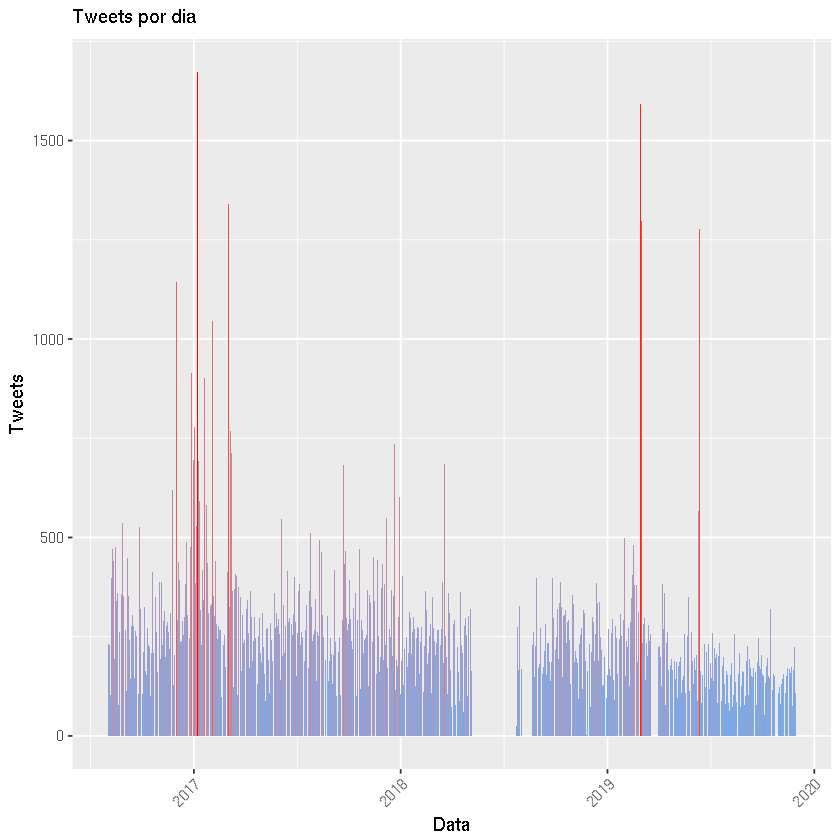

In [17]:
ggplot(data = twsDia, aes(x = datatweet, y = tweet, fill = tweet )) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_gradient(low = "#56B1F7", high = "red")+
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets por dia")

# Tweets por mês

In [18]:
twsMes <- dbGetQuery(con, paste("SELECT " ,
                          "to_char(datatweet, 'YYYY-MM') as datatweet, " ,
                          "count(t.codtweet) AS tweet " ,
                          "FROM tweet t " ,
                          "INNER JOIN amostratweet at ON at.codtweet = t.codtweet ",
                          "WHERE at.codamostra = 219 " ,
                          "GROUP BY 1" ,
                          "ORDER BY 1"))
saveRDS(twsMes, file = "data/twsMes2020.rds")

In [19]:
twsMes

datatweet,tweet
2016-08,9534
2016-09,7855
2016-10,9159
2016-11,8417
2016-12,14716
2017-01,15087
2017-02,8633
2017-03,11443
2017-04,8030
2017-05,8592


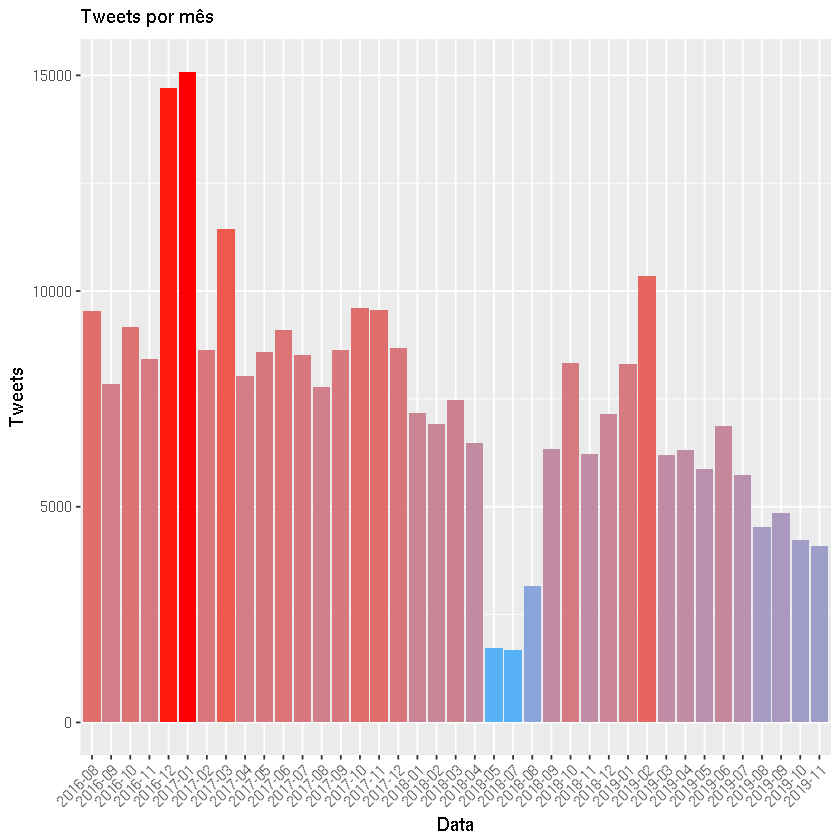

In [20]:
ggplot(data = twsMes, aes(x = datatweet, y = tweet, fill = tweet )) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_gradient(low = "#56B1F7", high = "red")+
  xlab("Data") + 
  ylab("Tweets") + 
  ggtitle("Tweets por mês")

In [21]:
twsPais <- dbGetQuery(con, paste("SELECT " ,
                          "local1 as pais, " ,
                          "count(t.codtweet) AS tweet FROM tweet t " ,
                          "inner join amostratweet at on at.codtweet = t.codtweet ",
                          "where at.codamostra = 219 and local1 <> '' ",
                          "GROUP BY 1" ,
                          "ORDER BY 2 desc"))
saveRDS(twsPais, file = "data/twsPais")
twsPais

pais,tweet
United States,1772
United Kingdom,415
India,361
Canada,114
Australia,104
Kingdom of Saudi Arabia,33
Republic of the Philippines,23
United Arab Emirates,23
Mexico,19
Ireland,19


In [22]:
twsPais <- dbGetQuery(con, paste("SELECT " ,
                          "local1 as pais, " ,
                          "count(t.codtweet) AS tweet FROM tweet t " ,
                          "inner join amostratweet at on at.codtweet = t.codtweet ",
                          "where at.codamostra = 219 and local1 <> '' ",
                          "GROUP BY 1" ,
                          "ORDER BY 2 desc"))
saveRDS(twsPais, file = "data/twsPais")
twsPais

pais,tweet
United States,1772
United Kingdom,415
India,361
Canada,114
Australia,104
Kingdom of Saudi Arabia,33
Republic of the Philippines,23
United Arab Emirates,23
Mexico,19
Ireland,19


In [23]:
twsIdiomas <- dbGetQuery(con, paste("SELECT " ,
                          "json->>'lang' as idioma, count(t.codtweet) as quantidade" ,
                          "from tweet t",
                          "inner join amostratweet at on at.codtweet = t.codtweet ",
                          "where at.codamostra = 218 ",
                          "GROUP BY 1" ,
                          "ORDER BY 2 desc"))
saveRDS(twsIdiomas, file = "data/twsIdiomas")
twsIdiomas

idioma,quantidade
en,293306
ja,10083
und,5478
fr,2041
ca,1694
de,1017
da,809
es,805
ro,608
tr,517
